<a href="https://colab.research.google.com/github/NooRSayeD/Data-Processing-and-Plotting/blob/main/sleep_health_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sleep.csv')

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Person ID', 'Blood Pressure'])

In [ ]:
# Handle categorical columns: one-hot encode Gender and BMI Category
df = pd.get_dummies(df, columns=['Gender', 'BMI Category'], drop_first=True)

In [ ]:
# Fill missing values (if any) for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [ ]:
# Summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps    Systolic   Diastolic  
count    374.000000  374.000000    374.000000  374.000000  374.000000  
mean       5.385027   70.165775   6816.844920  128.553476   84.649733  
std        1.774526    4.135676   1617.915

In [ ]:
# Group by Occupation for mean Sleep Duration, Stress Level, and Daily Steps
grouped = df.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Stress Level': 'mean',
    'Daily Steps': 'mean'
}).reset_index()
print("\nGrouped by Occupation:\n", grouped)


Grouped by Occupation:
               Occupation  Sleep Duration  Stress Level  Daily Steps
0             Accountant        7.113514      4.594595  6881.081081
1                 Doctor        6.970423      6.732394  6808.450704
2               Engineer        7.987302      3.888889  5980.952381
3                 Lawyer        7.410638      5.063830  7661.702128
4                Manager        6.900000      5.000000  5500.000000
5                  Nurse        7.063014      5.547945  8057.534247
6   Sales Representative        5.900000      8.000000  3000.000000
7            Salesperson        6.403125      7.000000  6000.000000
8              Scientist        6.000000      7.000000  5350.000000
9      Software Engineer        6.750000      6.000000  5800.000000
10               Teacher        6.690000      4.525000  5957.500000


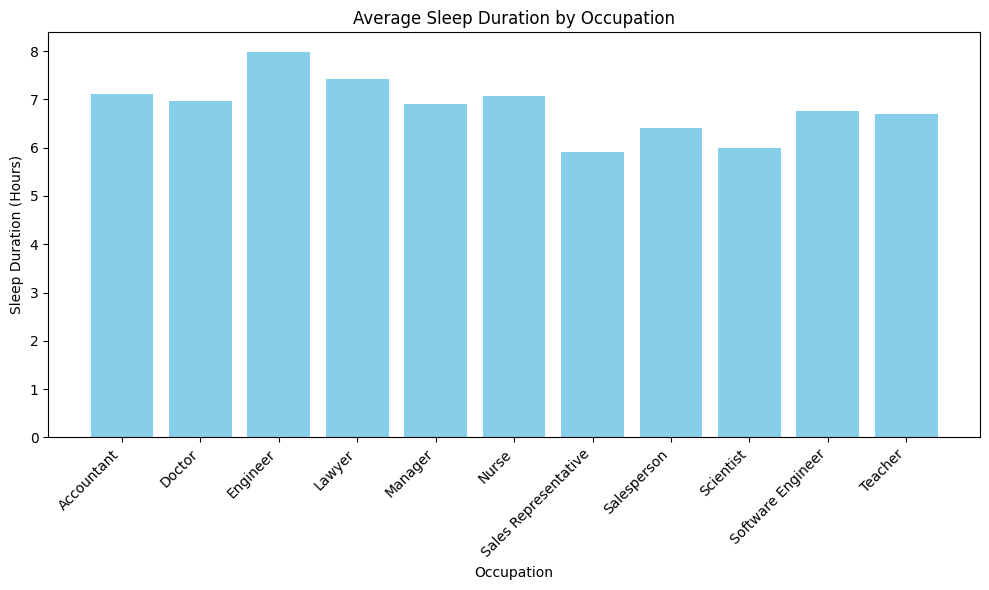

In [ ]:
# Plot 1: Bar plot - Average Sleep Duration by Occupation
plt.figure(figsize=(10, 6))
plt.bar(grouped['Occupation'], grouped['Sleep Duration'], color='skyblue')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (Hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

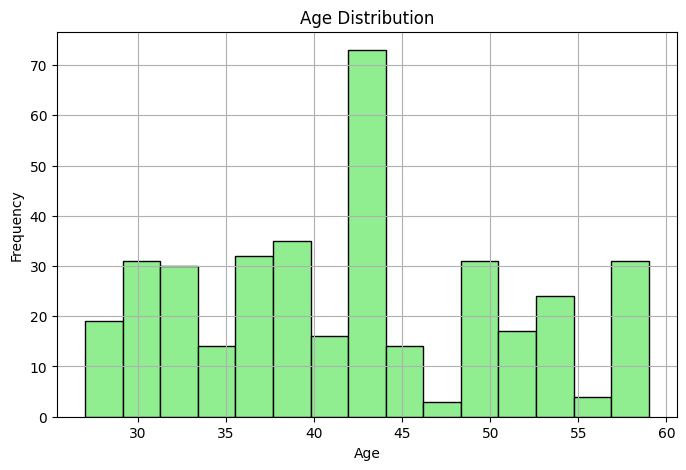

In [ ]:
# Plot 2: Histogram - Age Distribution
plt.figure(figsize=(8, 5))
df['Age'].hist(bins=15, edgecolor='black', color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

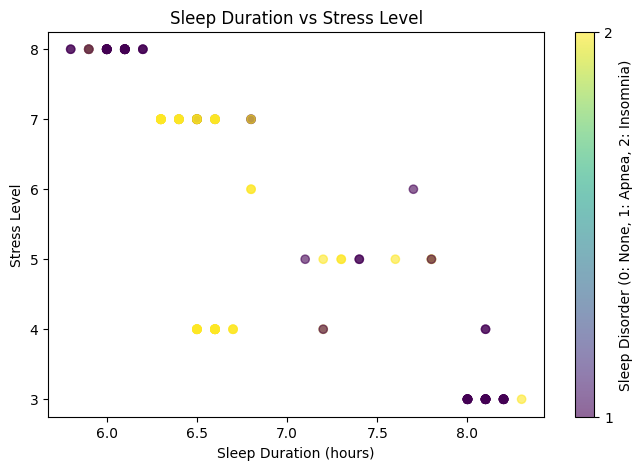

In [ ]:
# Plot 3: Scatter plot - Sleep Duration vs Stress Level by Sleep Disorder
disorder_map = {'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}
colors = df['Sleep Disorder'].map(disorder_map)
plt.figure(figsize=(8, 5))
plt.scatter(df['Sleep Duration'], df['Stress Level'], c=colors, cmap='viridis', alpha=0.6)
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.colorbar(ticks=[0, 1, 2], label='Sleep Disorder (0: None, 1: Apnea, 2: Insomnia)')
plt.show()

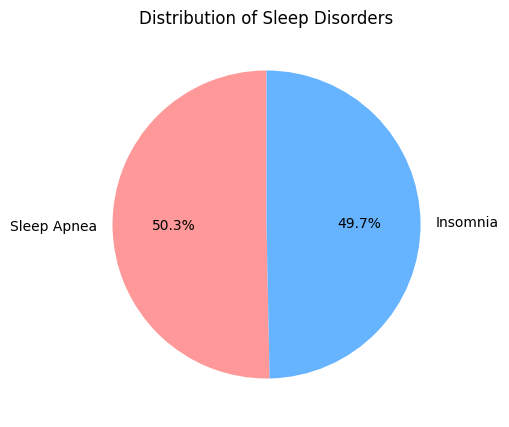

In [ ]:
# Plot 4: Pie chart - Sleep Disorder Distribution
disorder_counts = df['Sleep Disorder'].value_counts()
plt.figure(figsize=(5, 5))
disorder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Sleep Disorders')
plt.ylabel('')
plt.show()

<Figure size 800x500 with 0 Axes>

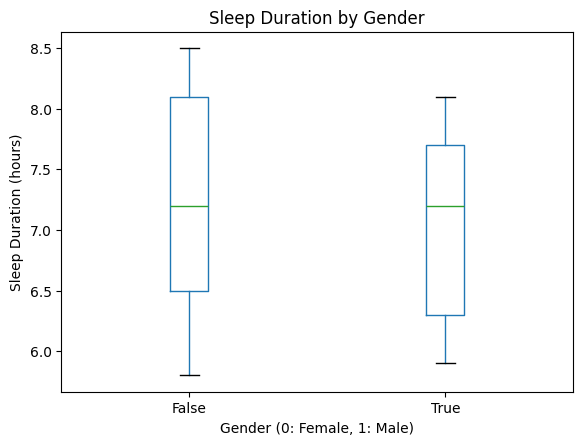

In [ ]:
# Plot 5: Box plot - Sleep Duration by Gender
plt.figure(figsize=(8, 5))
df.boxplot(column='Sleep Duration', by='Gender_Male', grid=False)
plt.title('Sleep Duration by Gender')
plt.suptitle('')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

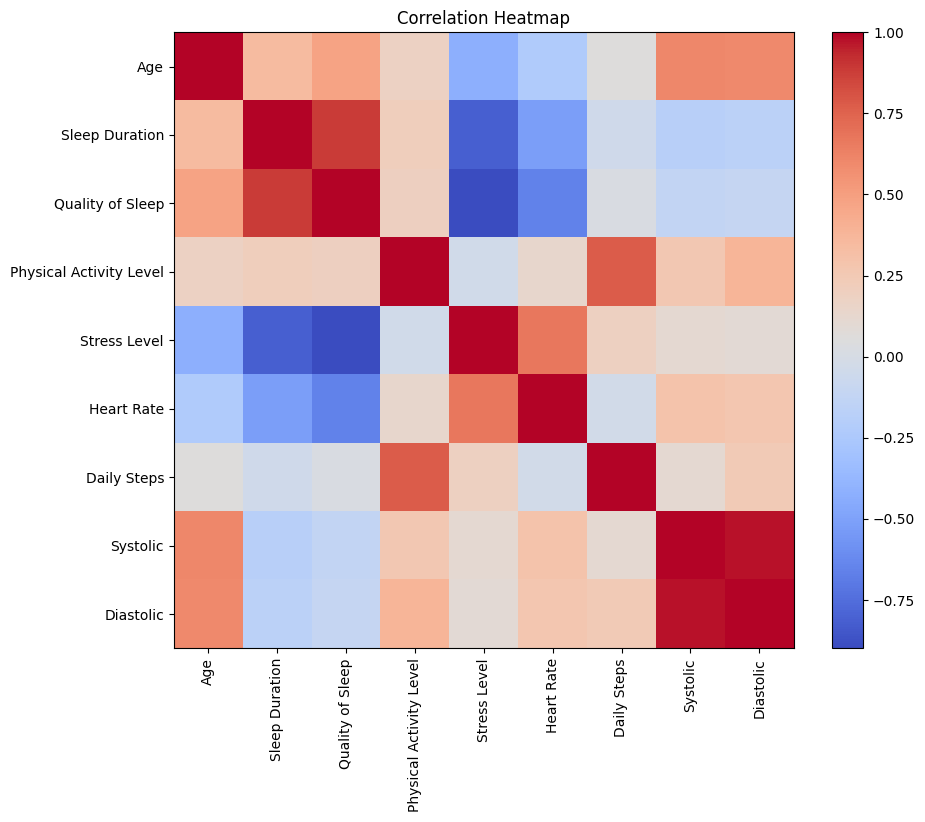

In [ ]:
# Plot 6: Correlation Heatmap
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()